模型價格: 14.2313
市場報價: 13.43 @ 14.1
交易邊際: 0.1313, 建議操作: BUY


/tmp/ipython-input-4165546208.py:94: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4165546208.py:94: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4165546208.py:94: UserWarning: Glyph 30408 (\N{CJK UNIFIED IDEOGRAPH-76C8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4165546208.py:94: UserWarning: Glyph 34407 (\N{CJK UNIFIED IDEOGRAPH-8667}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4165546208.py:94: UserWarning: Glyph 25913 (\N{CJK UNIFIED IDEOGRAPH-6539}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4165546208.py:94: UserWarning: Glyph 36914 (\N{CJK UNIFIED IDEOGRAPH-9032}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4165546208.py:94: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missi

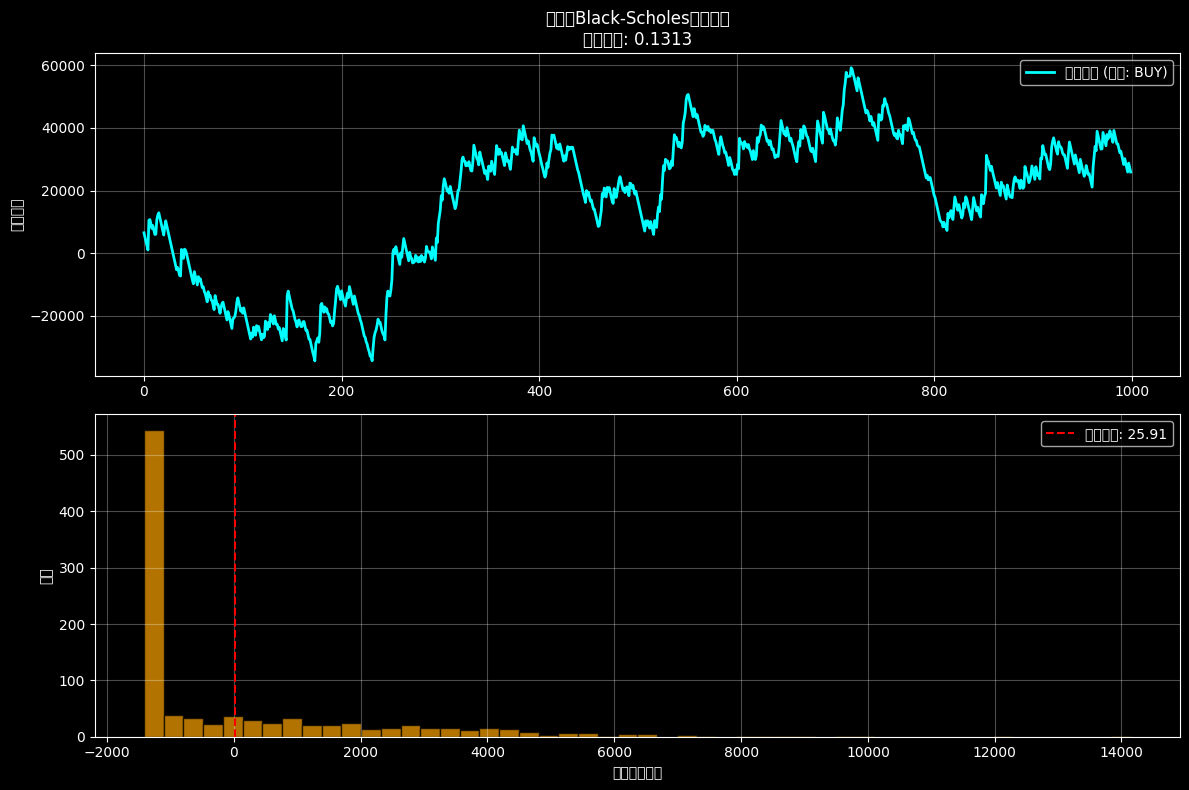


=== 策略統計 ===
平均單次交易盈虧: 25.91
盈虧標準差: 2201.71
盈利概率: 33.80%
最大盈利: 14144.61
最大虧損: -1417.05


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
!pip install qfin
import qfin as qf

class ImprovedBlackScholesTrader:
    def __init__(self):
        pass

    def black_scholes_call(self, S, K, sigma, r, t):
        """改進的Black-Scholes計算函數"""
        if t <= 0:
            return max(S - K, 0)
        if sigma <= 0:
            return max(S - K, 0)

        try:
            d1 = (np.log(S/K) + (r + (sigma**2)/2)*t) / (sigma * np.sqrt(t))
            d2 = d1 - (sigma * np.sqrt(t))
            C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
            return C
        except:
            return 0

    def calculate_trade_edge(self, model_price, market_bid, market_ask):
        """計算交易邊際"""
        # 如果模型價格高於賣價，可以考慮買入
        if model_price > market_ask:
            return model_price - market_ask, "BUY"
        # 如果模型價格低於買價，可以考慮賣出
        elif model_price < market_bid:
            return market_bid - model_price, "SELL"
        else:
            return 0, "HOLD"

    def simulate_trading(self, num_simulations=1000, transaction_cost=0.005):
        """模擬交易策略"""
        S, K, sigma, r, t = 100, 100, 0.3, 0.05, 1

        # 計算模型價格
        model_price = self.black_scholes_call(S, K, sigma, r, t)
        market_bid, market_ask = 13.43, 14.10  # 市場報價

        edge, action = self.calculate_trade_edge(model_price, market_bid, market_ask)
        print(f"模型價格: {model_price:.4f}")
        print(f"市場報價: {market_bid} @ {market_ask}")
        print(f"交易邊際: {edge:.4f}, 建議操作: {action}")

        pls = []
        premium = market_ask * 100  # 假設以賣價買入

        for i in range(num_simulations):
            path = qf.simulations.GeometricBrownianMotion(S, r, sigma, 1/252, t)
            final_price = path.simulated_path[-1]
            payoff = max(final_price - K, 0) * 100

            if action == "BUY":
                # 買入期權的盈虧
                net_pl = payoff - premium - (premium * transaction_cost)
            elif action == "SELL":
                # 賣出期權的盈虧（收到權利金，但要支付可能的損失）
                net_pl = premium - payoff - (premium * transaction_cost)
            else:
                net_pl = 0

            pls.append(net_pl)

        return pls, edge, action

    def plot_results(self, pls, edge, action):
        """繪製結果"""
        cumulative_pl = np.cumsum(pls)

        plt.figure(figsize=(12, 8))

        # 權益曲線
        plt.subplot(2, 1, 1)
        plt.plot(cumulative_pl, label=f'累計盈虧 (操作: {action})', color='cyan', linewidth=2)
        plt.title(f'改進的Black-Scholes交易策略\n交易邊際: {edge:.4f}')
        plt.ylabel('累計盈虧')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 盈虧分布
        plt.subplot(2, 1, 2)
        plt.hist(pls, bins=50, alpha=0.7, color='orange', edgecolor='black')
        plt.axvline(x=np.mean(pls), color='red', linestyle='--', label=f'平均盈虧: {np.mean(pls):.2f}')
        plt.xlabel('單次交易盈虧')
        plt.ylabel('頻率')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.style.use('dark_background')
        plt.show()

        # 打印統計信息
        print(f"\n=== 策略統計 ===")
        print(f"平均單次交易盈虧: {np.mean(pls):.2f}")
        print(f"盈虧標準差: {np.std(pls):.2f}")
        print(f"盈利概率: {np.mean(np.array(pls) > 0) * 100:.2f}%")
        print(f"最大盈利: {np.max(pls):.2f}")
        print(f"最大虧損: {np.min(pls):.2f}")

# 使用改進的策略
trader = ImprovedBlackScholesTrader()
pls, edge, action = trader.simulate_trading(num_simulations=1000)
trader.plot_results(pls, edge, action)

1. 快速測試單一場景:
=== 快速測試: NORMAL 環境, balanced 策略 ===
模型價格: 15.0602
市場報價: 14.3135 @ 15.2499
交易邊際: 0.7467, 建議操作: SELL
環境參數 - 波動率: 0.322, 利率: 0.050

2. 運行全面分析 (這需要一些時間):

=== 分析 LOW 波動率環境 ===
策略: conservative
  平均P/L: -291.57, 勝率: 28.0%
策略: balanced
  平均P/L: -291.98, 勝率: 62.0%
策略: aggressive
  平均P/L: 56.29, 勝率: 35.0%

=== 分析 NORMAL 波動率環境 ===
策略: conservative
  平均P/L: 194.66, 勝率: 36.0%
策略: balanced
  平均P/L: -65.70, 勝率: 31.0%
策略: aggressive
  平均P/L: 355.94, 勝率: 42.0%

=== 分析 HIGH 波動率環境 ===
策略: conservative
  平均P/L: -21.12, 勝率: 67.0%
策略: balanced
  平均P/L: 92.31, 勝率: 77.0%
策略: aggressive
  平均P/L: 451.73, 勝率: 33.0%

=== 分析 CRISIS 波動率環境 ===
策略: conservative
  平均P/L: 1799.00, 勝率: 39.0%
策略: balanced
  平均P/L: -1424.65, 勝率: 17.0%
策略: aggressive
  平均P/L: -1336.00, 勝率: 74.0%


/tmp/ipython-input-91998197.py:236: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-91998197.py:236: UserWarning: Glyph 22580 (\N{CJK UNIFIED IDEOGRAPH-5834}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-91998197.py:236: UserWarning: Glyph 29872 (\N{CJK UNIFIED IDEOGRAPH-74B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-91998197.py:236: UserWarning: Glyph 22659 (\N{CJK UNIFIED IDEOGRAPH-5883}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-91998197.py:236: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-91998197.py:236: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-91998197.py:236: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from

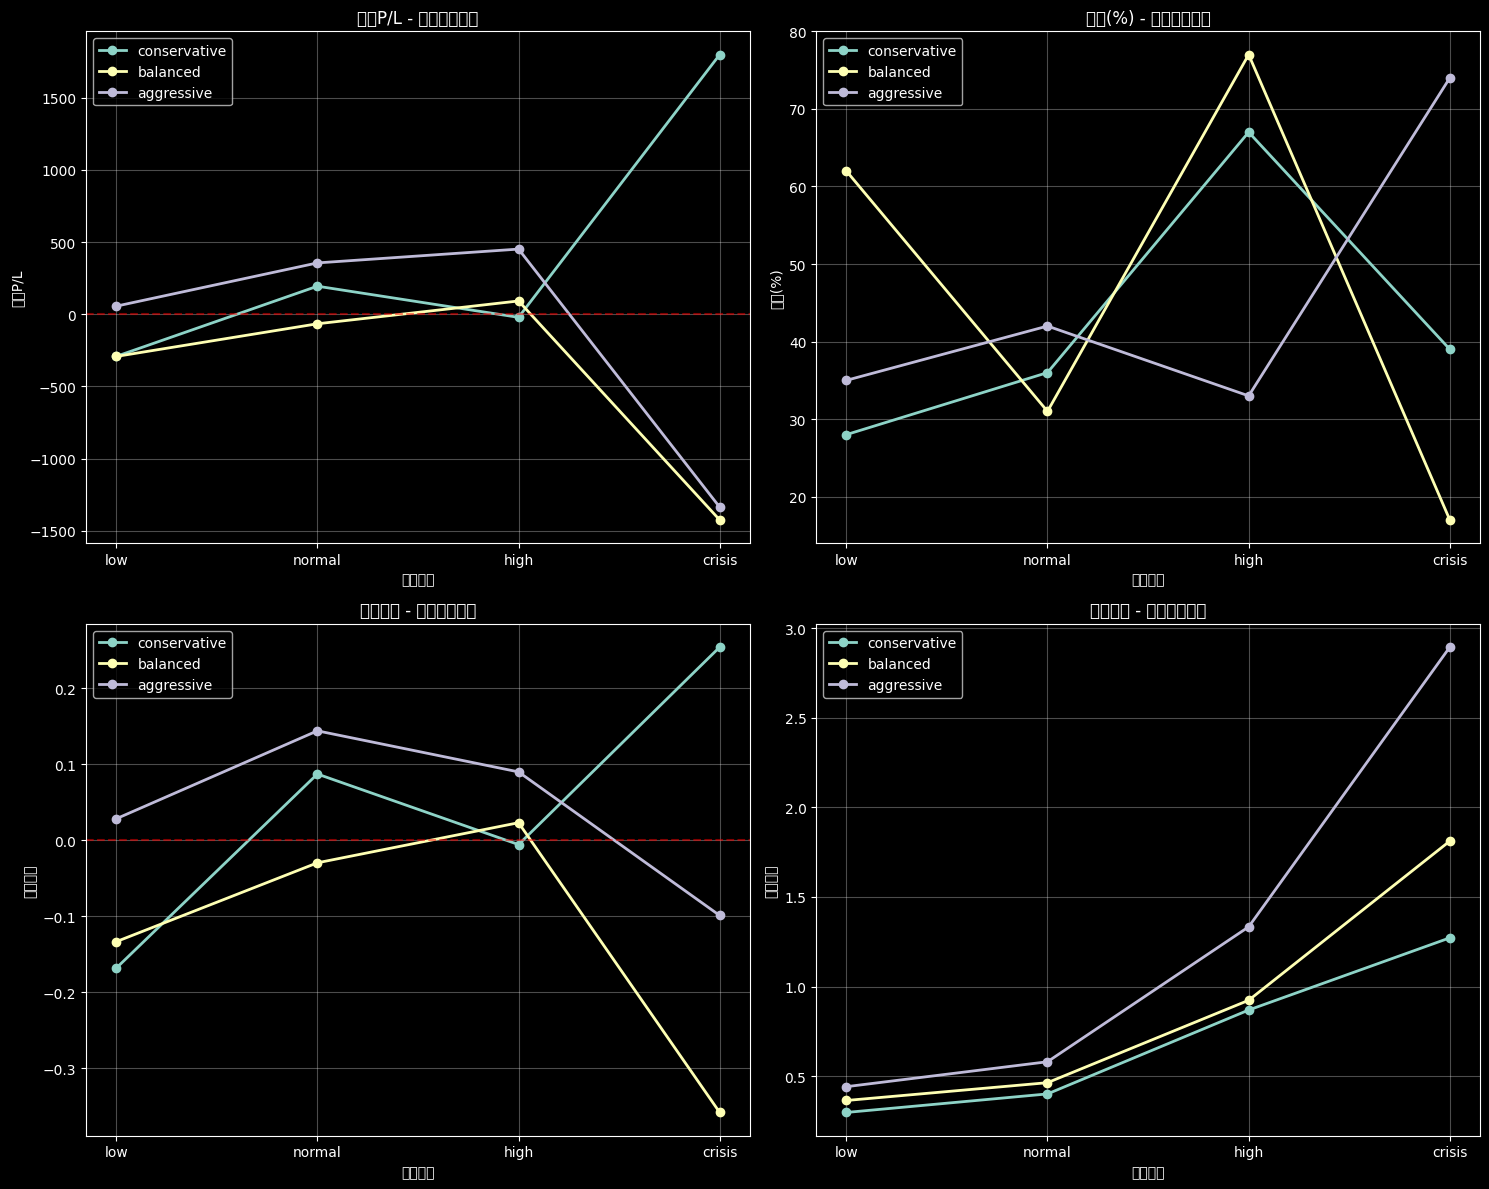


=== 詳細結果表 ===
環境         策略           平均P/L      勝率(%)      夏普比率         交易邊際      
----------------------------------------------------------------------
low        conservative -291.57    28.0       -0.168       0.2971    
low        balanced     -291.98    62.0       -0.133       0.3639    
low        aggressive   56.29      35.0       0.028        0.4410    
normal     conservative 194.66     36.0       0.087        0.4006    
normal     balanced     -65.70     31.0       -0.030       0.4633    
normal     aggressive   355.94     42.0       0.144        0.5802    
high       conservative -21.12     67.0       -0.006       0.8689    
high       balanced     92.31      77.0       0.023        0.9233    
high       aggressive   451.73     33.0       0.090        1.3332    
crisis     conservative 1799.00    39.0       0.254        1.2718    
crisis     balanced     -1424.65   17.0       -0.358       1.8121    
crisis     aggressive   -1336.00   74.0       -0.099       2.8949    

3. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import qfin as qf
import random

class AdvancedBlackScholesTrader:
    def __init__(self):
        self.risk_free_rate = 0.05  # 基準無風險利率

    def black_scholes_call(self, S, K, sigma, r, t):
        """改進的Black-Scholes計算函數"""
        if t <= 0:
            return max(S - K, 0)
        if sigma <= 0:
            return max(S - K, 0)

        try:
            d1 = (np.log(S/K) + (r + (sigma**2)/2)*t) / (sigma * np.sqrt(t))
            d2 = d1 - (sigma * np.sqrt(t))
            C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
            return C
        except:
            return 0

    def generate_realistic_market_quote(self, model_price, volatility, liquidity="normal"):
        """生成更真實的市場報價，考慮流動性和波動率"""
        # 基礎買賣價差
        if liquidity == "high":
            spread_multiplier = 0.01  # 高流動性，價差小
        elif liquidity == "low":
            spread_multiplier = 0.03  # 低流動性，價差大
        else:
            spread_multiplier = 0.02  # 正常流動性

        # 波動率對價差的影響
        volatility_impact = volatility * 0.1

        # 總價差
        total_spread = model_price * (spread_multiplier + volatility_impact)

        # 市場製造商的利潤邊際
        market_maker_edge = model_price * 0.005

        # 最終報價
        bid = model_price - total_spread/2 - market_maker_edge
        ask = model_price + total_spread/2 + market_maker_edge

        # 添加隨機噪音（真實市場中報價不會完美對齊模型）
        noise = random.uniform(-0.02, 0.02) * model_price
        bid += noise
        ask += noise

        return max(bid, 0.01), max(ask, 0.01)

    def calculate_trade_edge(self, model_price, market_bid, market_ask, strategy="conservative"):
        """計算交易邊際，考慮不同策略"""
        edge_to_bid = model_price - market_bid  # 賣出邊際
        edge_to_ask = market_ask - model_price  # 買入邊際

        if strategy == "aggressive":
            # 積極策略：只要有邊際就交易
            if edge_to_bid > edge_to_ask and edge_to_bid > 0:
                return edge_to_bid, "SELL"
            elif edge_to_ask > 0:
                return edge_to_ask, "BUY"
            else:
                return 0, "HOLD"

        elif strategy == "conservative":
            # 保守策略：只在邊際足夠大時交易
            min_edge = model_price * 0.02  # 至少2%的邊際
            if edge_to_bid > min_edge and edge_to_bid > edge_to_ask:
                return edge_to_bid, "SELL"
            elif edge_to_ask > min_edge:
                return edge_to_ask, "BUY"
            else:
                return 0, "HOLD"
        else:
            # 平衡策略
            min_edge = model_price * 0.01  # 至少1%的邊際
            if edge_to_bid > min_edge and edge_to_bid > edge_to_ask:
                return edge_to_bid, "SELL"
            elif edge_to_ask > min_edge:
                return edge_to_ask, "BUY"
            else:
                return 0, "HOLD"

    def simulate_volatility_regime(self, base_volatility, regime="normal"):
        """模擬不同的波動率環境"""
        if regime == "high":
            # 高波動環境：波動率更高且更不穩定
            return base_volatility * random.uniform(1.3, 2.0)
        elif regime == "low":
            # 低波動環境：波動率更低且更穩定
            return base_volatility * random.uniform(0.7, 1.0)
        elif regime == "crisis":
            # 危機環境：極高波動率且有跳躍
            return base_volatility * random.uniform(2.0, 4.0)
        else:
            # 正常環境
            return base_volatility * random.uniform(0.9, 1.2)

    def simulate_interest_rate_environment(self, base_rate, environment="normal"):
        """模擬不同的利率環境"""
        if environment == "high":
            return base_rate + random.uniform(0.02, 0.05)
        elif environment == "low":
            return max(0.001, base_rate - random.uniform(0.01, 0.03))  # 避免負利率
        else:
            return base_rate + random.uniform(-0.01, 0.01)

    def run_comprehensive_analysis(self, S=100, K=100, base_volatility=0.3,
                                 time_horizon=1, num_simulations=1000,
                                 transaction_cost=0.005):
        """運行全面的市場條件分析"""

        # 測試不同的市場環境
        market_regimes = ["low", "normal", "high", "crisis"]
        strategies = ["conservative", "balanced", "aggressive"]

        results = {}

        for regime in market_regimes:
            regime_results = {}
            print(f"\n=== 分析 {regime.upper()} 波動率環境 ===")

            for strategy in strategies:
                print(f"策略: {strategy}")

                # 模擬當前環境下的參數
                current_volatility = self.simulate_volatility_regime(base_volatility, regime)
                current_interest_rate = self.simulate_interest_rate_environment(self.risk_free_rate)

                # 計算模型價格
                model_price = self.black_scholes_call(S, K, current_volatility, current_interest_rate, time_horizon)

                # 生成市場報價
                liquidity = "high" if regime == "low" else "normal"
                market_bid, market_ask = self.generate_realistic_market_quote(model_price, current_volatility, liquidity)

                # 計算交易邊際
                edge, action = self.calculate_trade_edge(model_price, market_bid, market_ask, strategy)

                # 模擬交易
                pls = self.simulate_trading_in_environment(S, K, current_volatility, current_interest_rate,
                                                         time_horizon, market_ask, action, num_simulations//10,
                                                         transaction_cost, regime)

                # 存儲結果
                regime_results[strategy] = {
                    'avg_pl': np.mean(pls),
                    'std_pl': np.std(pls),
                    'win_rate': np.mean(np.array(pls) > 0) * 100,
                    'sharpe': np.mean(pls) / np.std(pls) if np.std(pls) > 0 else 0,
                    'edge': edge,
                    'action': action,
                    'model_price': model_price,
                    'market_bid': market_bid,
                    'market_ask': market_ask,
                    'volatility': current_volatility,
                    'interest_rate': current_interest_rate
                }

                print(f"  平均P/L: {np.mean(pls):.2f}, 勝率: {np.mean(np.array(pls) > 0) * 100:.1f}%")

            results[regime] = regime_results

        return results

    def simulate_trading_in_environment(self, S, K, volatility, r, t, premium, action,
                                      num_simulations, transaction_cost, regime):
        """在特定環境下模擬交易"""
        pls = []
        premium_amount = premium * 100

        for i in range(num_simulations):
            # 基礎幾何布朗運動
            path = qf.simulations.GeometricBrownianMotion(S, r, volatility, 1/252, t)
            final_price = path.simulated_path[-1]

            # 在高波動或危機環境中模擬價格跳躍
            if regime in ["high", "crisis"] and random.random() < 0.1:  # 10%的跳躍概率
                jump_size = random.uniform(-0.1, 0.1) if regime == "high" else random.uniform(-0.2, 0.2)
                final_price *= (1 + jump_size)

            payoff = max(final_price - K, 0) * 100

            if action == "BUY":
                net_pl = payoff - premium_amount - (premium_amount * transaction_cost)
            elif action == "SELL":
                net_pl = premium_amount - payoff - (premium_amount * transaction_cost)
            else:
                net_pl = 0

            pls.append(net_pl)

        return pls

    def plot_comprehensive_results(self, results):
        """繪製全面分析結果"""
        strategies = list(results[list(results.keys())[0]].keys())
        regimes = list(results.keys())

        # 創建子圖
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()

        # 指標列表
        metrics = ['avg_pl', 'win_rate', 'sharpe', 'edge']
        metric_names = ['平均P/L', '勝率(%)', '夏普比率', '交易邊際']

        for idx, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
            ax = axes[idx]

            # 為每個策略收集數據
            for strategy in strategies:
                values = [results[regime][strategy][metric] for regime in regimes]

                # 特殊處理勝率（已經是百分比）
                if metric == 'win_rate':
                    values = [v for v in values]

                ax.plot(regimes, values, marker='o', label=strategy, linewidth=2)

            ax.set_title(f'{metric_name} - 不同市場環境')
            ax.set_xlabel('市場環境')
            ax.set_ylabel(metric_name)
            ax.legend()
            ax.grid(True, alpha=0.3)

            # 為夏普比率和P/L添加零線
            if metric in ['avg_pl', 'sharpe']:
                ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)

        plt.tight_layout()
        plt.style.use('dark_background')
        plt.show()

        # 打印詳細結果表格
        print("\n=== 詳細結果表 ===")
        print(f"{'環境':<10} {'策略':<12} {'平均P/L':<10} {'勝率(%)':<10} {'夏普比率':<12} {'交易邊際':<10}")
        print("-" * 70)

        for regime in regimes:
            for strategy in strategies:
                data = results[regime][strategy]
                print(f"{regime:<10} {strategy:<12} {data['avg_pl']:<10.2f} {data['win_rate']:<10.1f} "
                      f"{data['sharpe']:<12.3f} {data['edge']:<10.4f}")

    def quick_test_single_scenario(self, S=100, K=100, base_volatility=0.3,
                                 strategy="balanced", regime="normal"):
        """快速測試單一場景 """
        print(f"=== 快速測試: {regime.upper()} 環境, {strategy} 策略 ===")

        # 模擬當前環境下的參數
        current_volatility = self.simulate_volatility_regime(base_volatility, regime)
        current_interest_rate = self.simulate_interest_rate_environment(self.risk_free_rate)

        # 計算模型價格
        model_price = self.black_scholes_call(S, K, current_volatility, current_interest_rate, 1)

        # 生成市場報價
        liquidity = "high" if regime == "low" else "normal"
        market_bid, market_ask = self.generate_realistic_market_quote(model_price, current_volatility, liquidity)

        # 計算交易邊際
        edge, action = self.calculate_trade_edge(model_price, market_bid, market_ask, strategy)

        print(f"模型價格: {model_price:.4f}")
        print(f"市場報價: {market_bid:.4f} @ {market_ask:.4f}")
        print(f"交易邊際: {edge:.4f}, 建議操作: {action}")
        print(f"環境參數 - 波動率: {current_volatility:.3f}, 利率: {current_interest_rate:.3f}")

        return {
            'model_price': model_price,
            'market_bid': market_bid,
            'market_ask': market_ask,
            'edge': edge,
            'action': action,
            'volatility': current_volatility,
            'interest_rate': current_interest_rate
        }

# ==================== 使用方法示例 ====================

# 創建交易者實例
trader = AdvancedBlackScholesTrader()

print("1. 快速測試單一場景:")
print("=" * 50)

# 測試單一場景
result = trader.quick_test_single_scenario(
    S=100,
    K=100,
    base_volatility=0.3,
    strategy="balanced",
    regime="normal"
)

print("\n2. 運行全面分析 :")
print("=" * 50)

# 運行全面分析
results = trader.run_comprehensive_analysis(
    S=100,
    K=100,
    base_volatility=0.3,
    time_horizon=1,
    num_simulations=1000,
    transaction_cost=0.005
)

# 繪製結果
trader.plot_comprehensive_results(results)

print("\n3. 測試不同波動率環境:")
print("=" * 50)

# 測試不同波動率環境
volatility_levels = [0.2, 0.3, 0.4, 0.5]
for vol in volatility_levels:
    print(f"\n波動率 {vol}:")
    result = trader.quick_test_single_scenario(
        S=100,
        K=100,
        base_volatility=vol,
        strategy="balanced",
        regime="normal"
    )

1. 比較Black-Scholes和Monte Carlo定價:

=== Black-Scholes vs Monte Carlo 比較 ===
Black-Scholes價格: 14.231255
Monte Carlo價格: 14.094221
價格差異: 0.137034
Monte Carlo標準誤差: 0.105678
95%置信區間: [13.887092, 14.301350]


/tmp/ipython-input-59559926.py:375: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:375: UserWarning: Glyph 31471 (\N{CJK UNIFIED IDEOGRAPH-7AEF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:375: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:375: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:375: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:375: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:375: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from

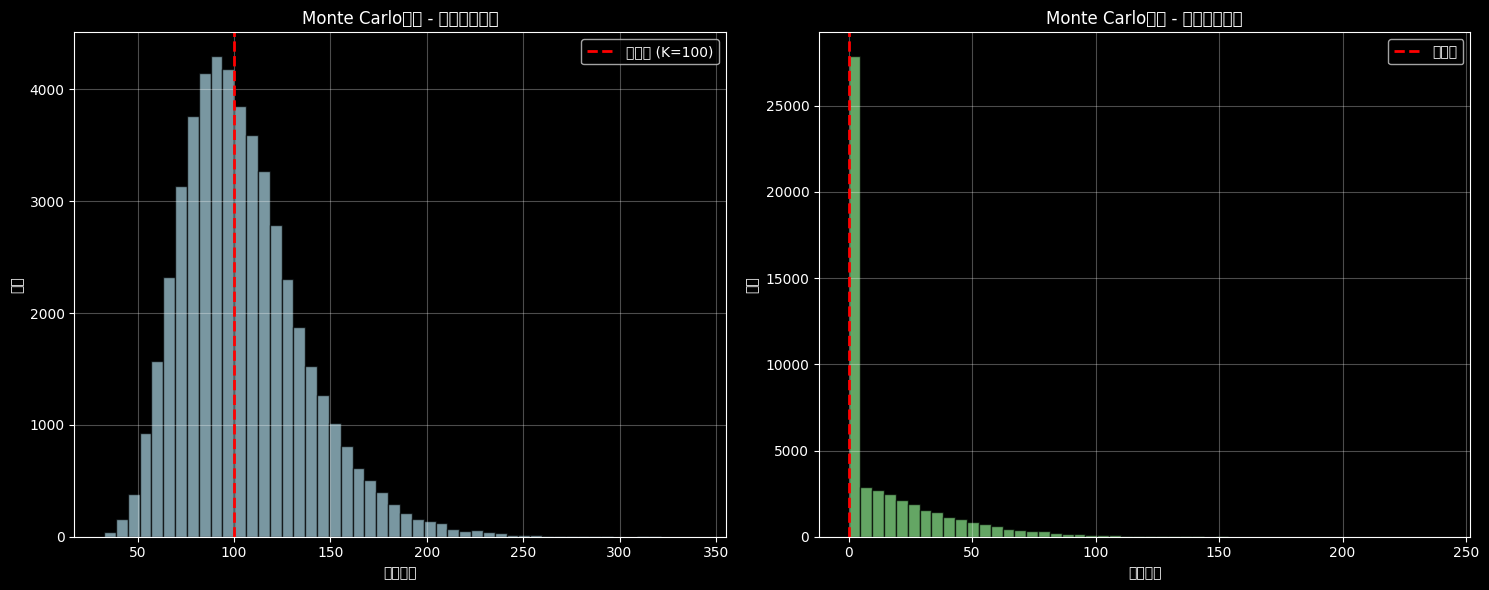


2. 快速測試單一場景:
=== 快速測試: HIGH 環境, balanced 策略 ===
BS模型價格: 25.1587
MC模型價格: 24.3759
市場報價: 24.0849 @ 26.3211
交易邊際: 1.1624, 建議操作: BUY
環境參數 - 波動率: 0.589, 利率: 0.051

3. 運行全面分析 (這需要一些時間):

=== 分析 LOW 波動率環境 ===
策略: conservative
  平均P/L: -301.52, 勝率: 27.0%, p-value: 0.0113
策略: balanced
  平均P/L: -206.38, 勝率: 64.0%, p-value: 0.2026
策略: aggressive
  平均P/L: -114.79, 勝率: 29.0%, p-value: 0.4547

=== 分析 NORMAL 波動率環境 ===
策略: conservative
  平均P/L: -77.98, 勝率: 66.0%, p-value: 0.6822
策略: balanced
  平均P/L: 51.97, 勝率: 69.0%, p-value: 0.7407
策略: aggressive
  平均P/L: 187.35, 勝率: 33.0%, p-value: 0.3870

=== 分析 HIGH 波動率環境 ===
策略: conservative
  平均P/L: 227.84, 勝率: 73.5%, p-value: 0.4264
策略: balanced
  平均P/L: -185.86, 勝率: 33.5%, p-value: 0.3951
策略: aggressive
  平均P/L: 41.78, 勝率: 68.0%, p-value: 0.8397

=== 分析 CRISIS 波動率環境 ===
策略: conservative
  平均P/L: 820.36, 勝率: 23.0%, p-value: 0.3974
策略: balanced
  平均P/L: 31.39, 勝率: 78.5%, p-value: 0.9606
策略: aggressive
  平均P/L: -414.86, 勝率: 73.5%, p-value: 0.4804


/tmp/ipython-input-59559926.py:320: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:320: UserWarning: Glyph 22580 (\N{CJK UNIFIED IDEOGRAPH-5834}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:320: UserWarning: Glyph 29872 (\N{CJK UNIFIED IDEOGRAPH-74B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:320: UserWarning: Glyph 22659 (\N{CJK UNIFIED IDEOGRAPH-5883}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:320: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:320: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-59559926.py:320: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from

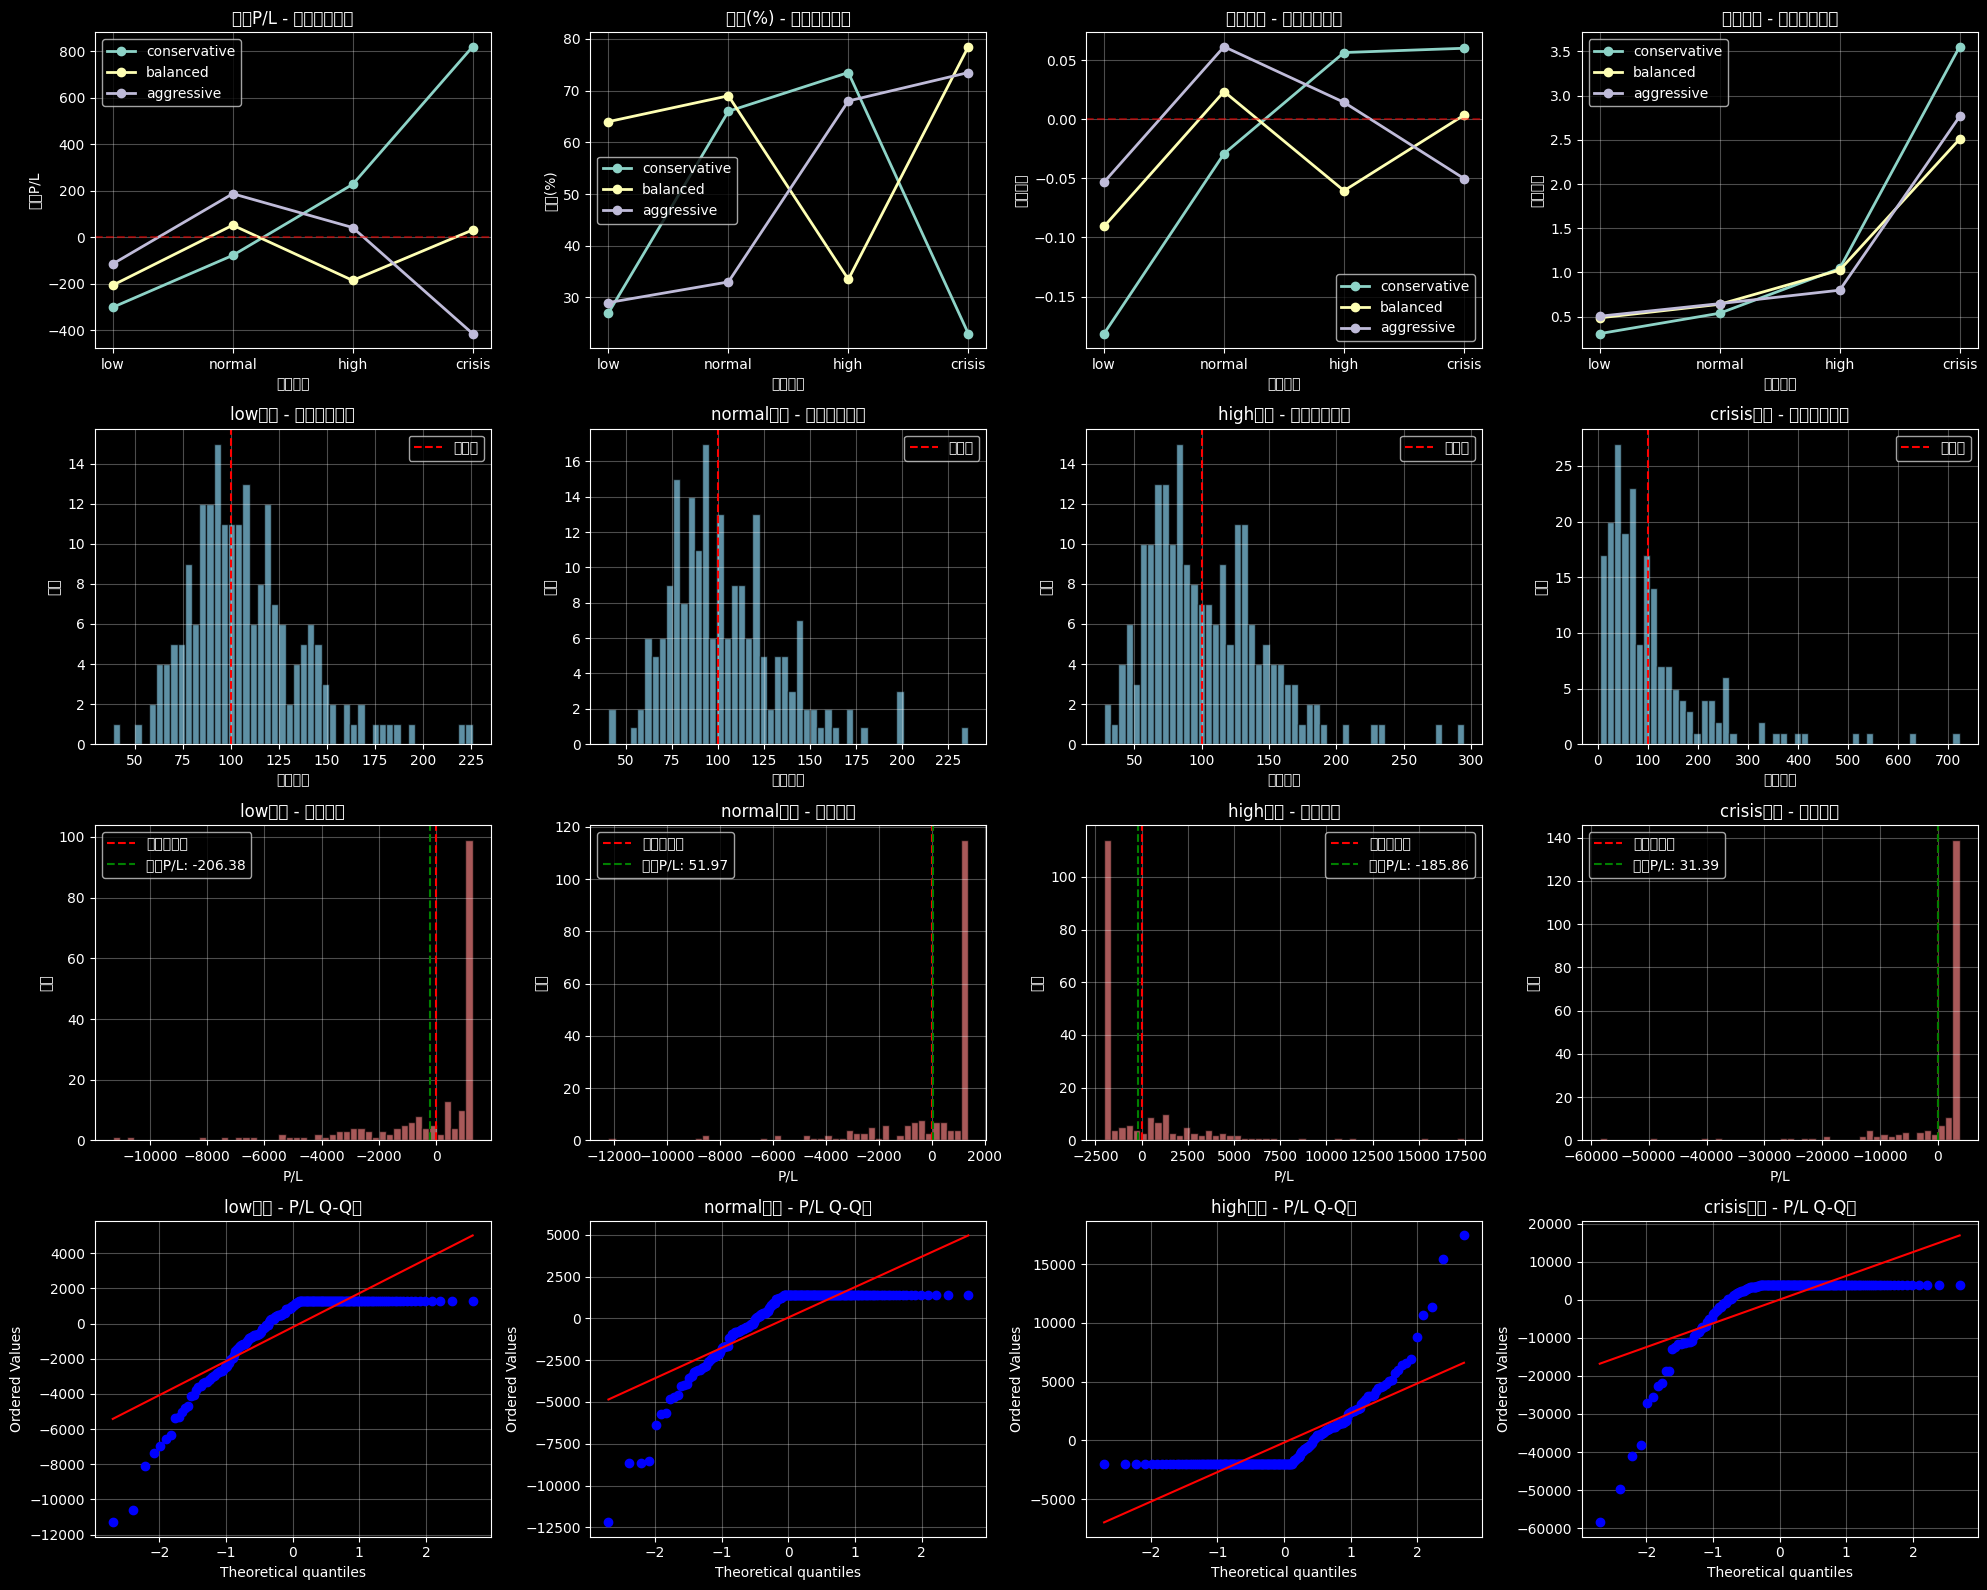


=== 詳細結果表 ===
環境         策略           平均P/L      勝率(%)      夏普比率         p-value   
--------------------------------------------------------------------------------
low        conservative -301.52    27.0       -0.181       0.0113     *
low        balanced     -206.38    64.0       -0.091       0.2026     
low        aggressive   -114.79    29.0       -0.053       0.4547     
normal     conservative -77.98     66.0       -0.029       0.6822     
normal     balanced     51.97      69.0       0.023        0.7407     
normal     aggressive   187.35     33.0       0.061        0.3870     
high       conservative 227.84     73.5       0.056        0.4264     
high       balanced     -185.86    33.5       -0.060       0.3951     
high       aggressive   41.78      68.0       0.014        0.8397     
crisis     conservative 820.36     23.0       0.060        0.3974     
crisis     balanced     31.39      78.5       0.004        0.9606     
crisis     aggressive   -414.86    73.5       -0.050

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_1samp, shapiro, probplot
import qfin as qf
import random
import seaborn as sns
from matplotlib.gridspec import GridSpec

class AdvancedBlackScholesTrader:
    def __init__(self):
        self.risk_free_rate = 0.05  # 基準無風險利率

    def black_scholes_call(self, S, K, sigma, r, t):
        """改進的Black-Scholes計算函數"""
        if t <= 0:
            return max(S - K, 0)
        if sigma <= 0:
            return max(S - K, 0)

        try:
            d1 = (np.log(S/K) + (r + (sigma**2)/2)*t) / (sigma * np.sqrt(t))
            d2 = d1 - (sigma * np.sqrt(t))
            C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
            return C
        except:
            return 0

    def monte_carlo_option_price(self, S, K, sigma, r, t, num_simulations=100000):
        """使用Monte Carlo模擬計算期權價格"""
        # 生成隨機路徑
        Z = np.random.standard_normal(num_simulations)
        # 幾何布朗運動公式
        ST = S * np.exp((r - 0.5 * sigma**2) * t + sigma * np.sqrt(t) * Z)
        # 計算收益
        payoffs = np.maximum(ST - K, 0)
        # 折現到現值
        option_price = np.exp(-r * t) * np.mean(payoffs)

        return option_price, payoffs, ST

    def generate_realistic_market_quote(self, model_price, volatility, liquidity="normal"):
        """生成更真實的市場報價，考慮流動性和波動率"""
        # 基礎買賣價差
        if liquidity == "high":
            spread_multiplier = 0.01  # 高流動性，價差小
        elif liquidity == "low":
            spread_multiplier = 0.03  # 低流動性，價差大
        else:
            spread_multiplier = 0.02  # 正常流動性

        # 波動率對價差的影響
        volatility_impact = volatility * 0.1

        # 總價差
        total_spread = model_price * (spread_multiplier + volatility_impact)

        # 市場製造商的利潤邊際
        market_maker_edge = model_price * 0.005

        # 最終報價
        bid = model_price - total_spread/2 - market_maker_edge
        ask = model_price + total_spread/2 + market_maker_edge

        # 添加隨機噪音（真實市場中報價不會完美對齊模型）
        noise = random.uniform(-0.02, 0.02) * model_price
        bid += noise
        ask += noise

        return max(bid, 0.01), max(ask, 0.01)

    def calculate_trade_edge(self, model_price, market_bid, market_ask, strategy="conservative"):
        """計算交易邊際，考慮不同策略"""
        edge_to_bid = model_price - market_bid  # 賣出邊際
        edge_to_ask = market_ask - model_price  # 買入邊際

        if strategy == "aggressive":
            # 積極策略：只要有邊際就交易
            if edge_to_bid > edge_to_ask and edge_to_bid > 0:
                return edge_to_bid, "SELL"
            elif edge_to_ask > 0:
                return edge_to_ask, "BUY"
            else:
                return 0, "HOLD"

        elif strategy == "conservative":
            # 保守策略：只在邊際足夠大時交易
            min_edge = model_price * 0.02  # 至少2%的邊際
            if edge_to_bid > min_edge and edge_to_bid > edge_to_ask:
                return edge_to_bid, "SELL"
            elif edge_to_ask > min_edge:
                return edge_to_ask, "BUY"
            else:
                return 0, "HOLD"
        else:
            # 平衡策略
            min_edge = model_price * 0.01  # 至少1%的邊際
            if edge_to_bid > min_edge and edge_to_bid > edge_to_ask:
                return edge_to_bid, "SELL"
            elif edge_to_ask > min_edge:
                return edge_to_ask, "BUY"
            else:
                return 0, "HOLD"

    def simulate_volatility_regime(self, base_volatility, regime="normal"):
        """模擬不同的波動率環境"""
        if regime == "high":
            # 高波動環境：波動率更高且更不穩定
            return base_volatility * random.uniform(1.3, 2.0)
        elif regime == "low":
            # 低波動環境：波動率更低且更穩定
            return base_volatility * random.uniform(0.7, 1.0)
        elif regime == "crisis":
            # 危機環境：極高波動率且有跳躍
            return base_volatility * random.uniform(2.0, 4.0)
        else:
            # 正常環境
            return base_volatility * random.uniform(0.9, 1.2)

    def simulate_interest_rate_environment(self, base_rate, environment="normal"):
        """模擬不同的利率環境"""
        if environment == "high":
            return base_rate + random.uniform(0.02, 0.05)
        elif environment == "low":
            return max(0.001, base_rate - random.uniform(0.01, 0.03))  # 避免負利率
        else:
            return base_rate + random.uniform(-0.01, 0.01)

    def run_comprehensive_analysis(self, S=100, K=100, base_volatility=0.3,
                                 time_horizon=1, num_simulations=1000,
                                 transaction_cost=0.005):
        """運行全面的市場條件分析"""

        # 測試不同的市場環境
        market_regimes = ["low", "normal", "high", "crisis"]
        strategies = ["conservative", "balanced", "aggressive"]

        results = {}

        for regime in market_regimes:
            regime_results = {}
            print(f"\n=== 分析 {regime.upper()} 波動率環境 ===")

            for strategy in strategies:
                print(f"策略: {strategy}")

                # 模擬當前環境下的參數
                current_volatility = self.simulate_volatility_regime(base_volatility, regime)
                current_interest_rate = self.simulate_interest_rate_environment(self.risk_free_rate)

                # 計算模型價格 - 同時使用BS和Monte Carlo
                bs_price = self.black_scholes_call(S, K, current_volatility, current_interest_rate, time_horizon)
                mc_price, mc_payoffs, mc_ST = self.monte_carlo_option_price(S, K, current_volatility, current_interest_rate, time_horizon)

                # 生成市場報價
                liquidity = "high" if regime == "low" else "normal"
                market_bid, market_ask = self.generate_realistic_market_quote(bs_price, current_volatility, liquidity)

                # 計算交易邊際
                edge, action = self.calculate_trade_edge(bs_price, market_bid, market_ask, strategy)

                # 模擬交易
                pls, terminal_prices, payoffs = self.simulate_trading_in_environment(
                    S, K, current_volatility, current_interest_rate,
                    time_horizon, market_ask, action, num_simulations//10,
                    transaction_cost, regime
                )

                # 統計檢定
                t_stat, p_value = ttest_1samp(pls, 0)

                # 存儲結果
                regime_results[strategy] = {
                    'avg_pl': np.mean(pls),
                    'std_pl': np.std(pls),
                    'win_rate': np.mean(np.array(pls) > 0) * 100,
                    'sharpe': np.mean(pls) / np.std(pls) if np.std(pls) > 0 else 0,
                    'edge': edge,
                    'action': action,
                    'bs_price': bs_price,
                    'mc_price': mc_price,
                    'market_bid': market_bid,
                    'market_ask': market_ask,
                    'volatility': current_volatility,
                    'interest_rate': current_interest_rate,
                    't_statistic': t_stat,
                    'p_value': p_value,
                    'terminal_prices': terminal_prices,
                    'payoffs': payoffs,
                    'pls': pls
                }

                print(f"  平均P/L: {np.mean(pls):.2f}, 勝率: {np.mean(np.array(pls) > 0) * 100:.1f}%, p-value: {p_value:.4f}")

            results[regime] = regime_results

        return results

    def simulate_trading_in_environment(self, S, K, volatility, r, t, premium, action,
                                      num_simulations, transaction_cost, regime):
        """在特定環境下模擬交易"""
        pls = []
        terminal_prices = []
        payoffs_list = []
        premium_amount = premium * 100

        for i in range(num_simulations):
            # 基礎幾何布朗運動
            path = qf.simulations.GeometricBrownianMotion(S, r, volatility, 1/252, t)
            final_price = path.simulated_path[-1]

            # 在高波動或危機環境中模擬價格跳躍
            if regime in ["high", "crisis"] and random.random() < 0.1:  # 10%的跳躍概率
                jump_size = random.uniform(-0.1, 0.1) if regime == "high" else random.uniform(-0.2, 0.2)
                final_price *= (1 + jump_size)

            payoff = max(final_price - K, 0) * 100

            if action == "BUY":
                net_pl = payoff - premium_amount - (premium_amount * transaction_cost)
            elif action == "SELL":
                net_pl = premium_amount - payoff - (premium_amount * transaction_cost)
            else:
                net_pl = 0

            pls.append(net_pl)
            terminal_prices.append(final_price)
            payoffs_list.append(payoff)

        return pls, terminal_prices, payoffs_list

    def plot_comprehensive_results(self, results):
        """繪製全面分析結果，包含詳細的統計圖形"""
        strategies = list(results[list(results.keys())[0]].keys())
        regimes = list(results.keys())

        # 創建更複雜的圖形佈局
        fig = plt.figure(figsize=(20, 16))
        gs = GridSpec(4, 4, figure=fig)

        # 指標列表
        metrics = ['avg_pl', 'win_rate', 'sharpe', 'edge']
        metric_names = ['平均P/L', '勝率(%)', '夏普比率', '交易邊際']

        # 第一行：策略表現指標
        for idx, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
            ax = fig.add_subplot(gs[0, idx])

            # 為每個策略收集數據
            for strategy in strategies:
                values = [results[regime][strategy][metric] for regime in regimes]
                ax.plot(regimes, values, marker='o', label=strategy, linewidth=2)

            ax.set_title(f'{metric_name} - 不同市場環境')
            ax.set_xlabel('市場環境')
            ax.set_ylabel(metric_name)
            ax.legend()
            ax.grid(True, alpha=0.3)

            # 為夏普比率和P/L添加零線
            if metric in ['avg_pl', 'sharpe']:
                ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)

        # 第二行：終端價格分布
        ax1 = fig.add_subplot(gs[1, 0])
        ax2 = fig.add_subplot(gs[1, 1])
        ax3 = fig.add_subplot(gs[1, 2])
        ax4 = fig.add_subplot(gs[1, 3])

        distribution_axes = [ax1, ax2, ax3, ax4]

        for idx, regime in enumerate(regimes):
            ax = distribution_axes[idx]
            # 選擇平衡策略的終端價格
            terminal_prices = results[regime]['balanced']['terminal_prices']
            ax.hist(terminal_prices, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
            ax.axvline(x=100, color='red', linestyle='--', label='行權價')
            ax.set_title(f'{regime}環境 - 終端價格分布')
            ax.set_xlabel('終端價格')
            ax.set_ylabel('頻率')
            ax.legend()
            ax.grid(True, alpha=0.3)

        # 第三行：盈虧分布
        ax1 = fig.add_subplot(gs[2, 0])
        ax2 = fig.add_subplot(gs[2, 1])
        ax3 = fig.add_subplot(gs[2, 2])
        ax4 = fig.add_subplot(gs[2, 3])

        pl_axes = [ax1, ax2, ax3, ax4]

        for idx, regime in enumerate(regimes):
            ax = pl_axes[idx]
            # 選擇平衡策略的P/L
            pls = results[regime]['balanced']['pls']
            ax.hist(pls, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
            ax.axvline(x=0, color='red', linestyle='--', label='盈虧平衡點')
            ax.axvline(x=np.mean(pls), color='green', linestyle='--', label=f'平均P/L: {np.mean(pls):.2f}')
            ax.set_title(f'{regime}環境 - 盈虧分布')
            ax.set_xlabel('P/L')
            ax.set_ylabel('頻率')
            ax.legend()
            ax.grid(True, alpha=0.3)

        # 第四行：Q-Q圖（正態性檢驗）
        ax1 = fig.add_subplot(gs[3, 0])
        ax2 = fig.add_subplot(gs[3, 1])
        ax3 = fig.add_subplot(gs[3, 2])
        ax4 = fig.add_subplot(gs[3, 3])

        qq_axes = [ax1, ax2, ax3, ax4]

        for idx, regime in enumerate(regimes):
            ax = qq_axes[idx]
            # 選擇平衡策略的P/L
            pls = results[regime]['balanced']['pls']
            probplot(pls, dist="norm", plot=ax)
            ax.set_title(f'{regime}環境 - P/L Q-Q圖')
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.style.use('dark_background')
        plt.show()

        # 打印詳細結果表格
        print("\n=== 詳細結果表 ===")
        print(f"{'環境':<10} {'策略':<12} {'平均P/L':<10} {'勝率(%)':<10} {'夏普比率':<12} {'p-value':<10}")
        print("-" * 80)

        for regime in regimes:
            for strategy in strategies:
                data = results[regime][strategy]
                significance = "***" if data['p_value'] < 0.001 else "**" if data['p_value'] < 0.01 else "*" if data['p_value'] < 0.05 else ""
                print(f"{regime:<10} {strategy:<12} {data['avg_pl']:<10.2f} {data['win_rate']:<10.1f} "
                      f"{data['sharpe']:<12.3f} {data['p_value']:<10.4f} {significance}")

    def compare_bs_vs_mc(self, S=100, K=100, sigma=0.3, r=0.05, t=1, num_simulations=100000):
        """比較Black-Scholes和Monte Carlo的定價結果"""
        # Black-Scholes價格
        bs_price = self.black_scholes_call(S, K, sigma, r, t)

        # Monte Carlo價格
        mc_price, payoffs, terminal_prices = self.monte_carlo_option_price(S, K, sigma, r, t, num_simulations)

        # 計算標準誤差
        mc_std_error = np.std(payoffs) / np.sqrt(num_simulations)

        print(f"\n=== Black-Scholes vs Monte Carlo 比較 ===")
        print(f"Black-Scholes價格: {bs_price:.6f}")
        print(f"Monte Carlo價格: {mc_price:.6f}")
        print(f"價格差異: {abs(bs_price - mc_price):.6f}")
        print(f"Monte Carlo標準誤差: {mc_std_error:.6f}")
        print(f"95%置信區間: [{mc_price - 1.96*mc_std_error:.6f}, {mc_price + 1.96*mc_std_error:.6f}]")

        # 繪製比較圖
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # 左圖：終端價格分布
        axes[0].hist(terminal_prices, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
        axes[0].axvline(x=K, color='red', linestyle='--', linewidth=2, label=f'行權價 (K={K})')
        axes[0].set_xlabel('終端價格')
        axes[0].set_ylabel('頻率')
        axes[0].set_title('Monte Carlo模擬 - 終端價格分布')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        # 右圖：收益分布
        axes[1].hist(payoffs, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='零收益')
        axes[1].set_xlabel('期權收益')
        axes[1].set_ylabel('頻率')
        axes[1].set_title('Monte Carlo模擬 - 期權收益分布')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.style.use('dark_background')
        plt.show()

        return bs_price, mc_price, mc_std_error

    def quick_test_single_scenario(self, S=100, K=100, base_volatility=0.3,
                                 strategy="balanced", regime="normal"):
        """快速測試單一場景"""
        print(f"=== 快速測試: {regime.upper()} 環境, {strategy} 策略 ===")

        # 模擬當前環境下的參數
        current_volatility = self.simulate_volatility_regime(base_volatility, regime)
        current_interest_rate = self.simulate_interest_rate_environment(self.risk_free_rate)

        # 計算模型價格 - 同時使用BS和Monte Carlo
        bs_price = self.black_scholes_call(S, K, current_volatility, current_interest_rate, 1)
        mc_price, _, _ = self.monte_carlo_option_price(S, K, current_volatility, current_interest_rate, 1, 10000)

        # 生成市場報價
        liquidity = "high" if regime == "low" else "normal"
        market_bid, market_ask = self.generate_realistic_market_quote(bs_price, current_volatility, liquidity)

        # 計算交易邊際
        edge, action = self.calculate_trade_edge(bs_price, market_bid, market_ask, strategy)

        print(f"BS模型價格: {bs_price:.4f}")
        print(f"MC模型價格: {mc_price:.4f}")
        print(f"市場報價: {market_bid:.4f} @ {market_ask:.4f}")
        print(f"交易邊際: {edge:.4f}, 建議操作: {action}")
        print(f"環境參數 - 波動率: {current_volatility:.3f}, 利率: {current_interest_rate:.3f}")

        return {
            'bs_price': bs_price,
            'mc_price': mc_price,
            'market_bid': market_bid,
            'market_ask': market_ask,
            'edge': edge,
            'action': action,
            'volatility': current_volatility,
            'interest_rate': current_interest_rate
        }

# ==================== 使用方法示例 ====================

# 創建交易者實例
trader = AdvancedBlackScholesTrader()

print("1. 比較Black-Scholes和Monte Carlo定價:")
print("=" * 50)

# 比較BS和MC
bs_price, mc_price, mc_error = trader.compare_bs_vs_mc(
    S=100,
    K=100,
    sigma=0.3,
    r=0.05,
    t=1,
    num_simulations=50000
)

print("\n2. 快速測試單一場景:")
print("=" * 50)

# 測試單一場景
result = trader.quick_test_single_scenario(
    S=100,
    K=100,
    base_volatility=0.3,
    strategy="balanced",
    regime="high"  # 測試高波動環境
)

print("\n3. 運行全面分析 :")
print("=" * 50)

# 運行全面分析
results = trader.run_comprehensive_analysis(
    S=100,
    K=100,
    base_volatility=0.3,
    time_horizon=1,
    num_simulations=2000,
    transaction_cost=0.005
)

# 繪製結果
trader.plot_comprehensive_results(results)

1. Comparing Black-Scholes and Monte Carlo Pricing:

=== Black-Scholes vs Monte Carlo Comparison ===
Black-Scholes Price: 14.231255
Monte Carlo Price: 14.372129
Price Difference: 0.140874
Monte Carlo Standard Error: 0.106614
95% Confidence Interval: [14.163166, 14.581091]


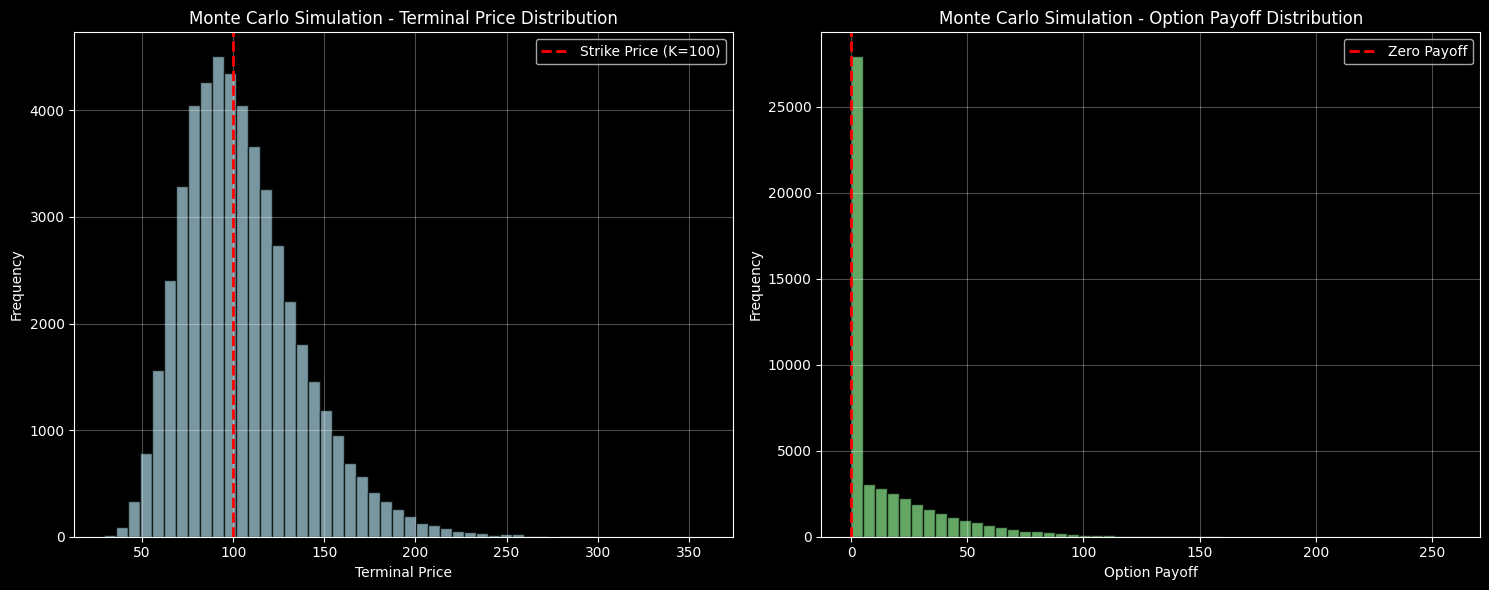


2. Quick Test Single Scenario:
=== Quick Test: HIGH Environment, balanced Strategy ===
BS Model Price: 22.2124
MC Model Price: 22.7473
Market Quote: 21.0720 @ 22.8950
Trade Edge: 1.1404, Recommended Action: SELL
Environment Parameters - Volatility: 0.521, Interest Rate: 0.041

3. Running Comprehensive Analysis (This may take some time):

=== Analyzing LOW Volatility Environment ===
Strategy: conservative
  Avg P/L: 61.26, Win Rate: 68.0%, p-value: 0.6633
Strategy: balanced
  Avg P/L: 116.03, Win Rate: 72.0%, p-value: 0.4365
Strategy: aggressive
  Avg P/L: -14.51, Win Rate: 64.0%, p-value: 0.8977

=== Analyzing NORMAL Volatility Environment ===
Strategy: conservative
  Avg P/L: 84.59, Win Rate: 38.5%, p-value: 0.5976
Strategy: balanced
  Avg P/L: 284.26, Win Rate: 33.0%, p-value: 0.1790
Strategy: aggressive
  Avg P/L: -47.36, Win Rate: 32.0%, p-value: 0.7930

=== Analyzing HIGH Volatility Environment ===
Strategy: conservative
  Avg P/L: -16.71, Win Rate: 70.5%, p-value: 0.9492
Strateg

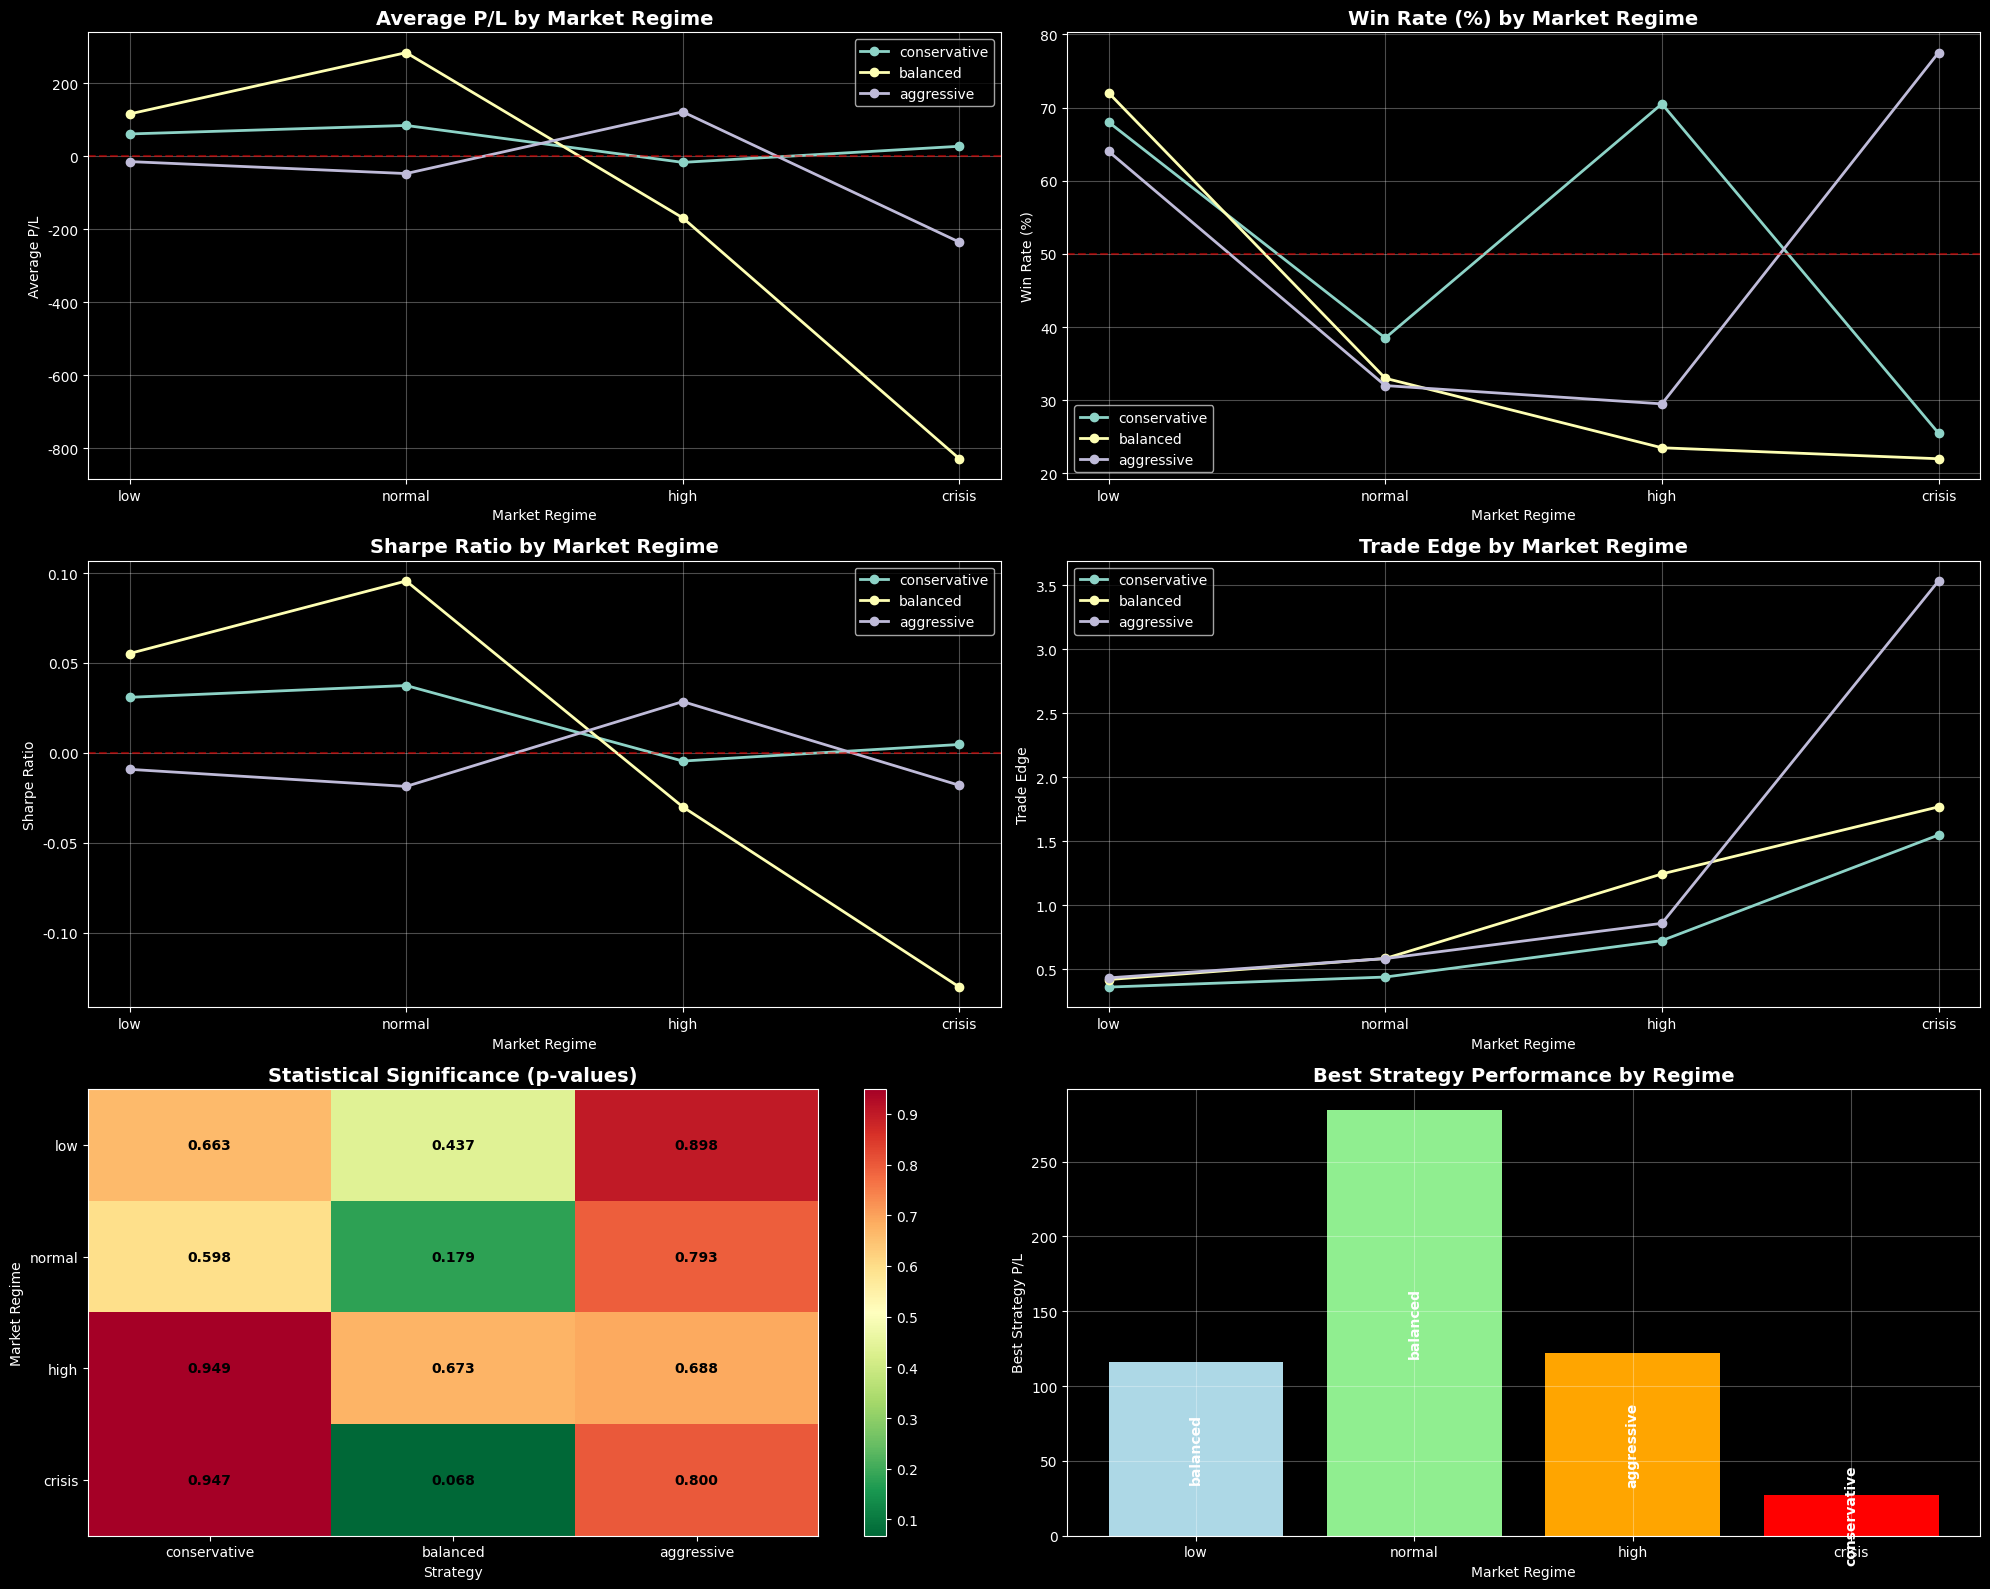


DETAILED RESULTS TABLE
Regime     Strategy     Avg P/L    Win Rate   Sharpe       p-value   
--------------------------------------------------------------------------------
low        conservative 61.26      68.0       0.031        0.6633     
low        balanced     116.03     72.0       0.055        0.4365     
low        aggressive   -14.51     64.0       -0.009       0.8977     
normal     conservative 84.59      38.5       0.037        0.5976     
normal     balanced     284.26     33.0       0.096        0.1790     
normal     aggressive   -47.36     32.0       -0.019       0.7930     
high       conservative -16.71     70.5       -0.005       0.9492     
high       balanced     -168.80    23.5       -0.030       0.6727     
high       aggressive   121.94     29.5       0.029        0.6876     
crisis     conservative 27.50      25.5       0.005        0.9472     
crisis     balanced     -829.44    22.0       -0.130       0.0678     
crisis     aggressive   -235.37    77.5     

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_1samp, shapiro, probplot
import qfin as qf
import random
import seaborn as sns
from matplotlib.gridspec import GridSpec


plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']
plt.rcParams['axes.unicode_minus'] = False

class AdvancedBlackScholesTrader:
    def __init__(self):
        self.risk_free_rate = 0.05  # 基準無風險利率

    def black_scholes_call(self, S, K, sigma, r, t):
        """改進的Black-Scholes計算函數"""
        if t <= 0:
            return max(S - K, 0)
        if sigma <= 0:
            return max(S - K, 0)

        try:
            d1 = (np.log(S/K) + (r + (sigma**2)/2)*t) / (sigma * np.sqrt(t))
            d2 = d1 - (sigma * np.sqrt(t))
            C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
            return C
        except:
            return 0

    def monte_carlo_option_price(self, S, K, sigma, r, t, num_simulations=100000):
        """使用Monte Carlo模擬計算期權價格"""
        # 生成隨機路徑
        Z = np.random.standard_normal(num_simulations)
        # 幾何布朗運動公式
        ST = S * np.exp((r - 0.5 * sigma**2) * t + sigma * np.sqrt(t) * Z)
        # 計算收益
        payoffs = np.maximum(ST - K, 0)
        # 折現到現值
        option_price = np.exp(-r * t) * np.mean(payoffs)

        return option_price, payoffs, ST

    def generate_realistic_market_quote(self, model_price, volatility, liquidity="normal"):
        """生成更真實的市場報價，考慮流動性和波動率"""
        # 基礎買賣價差
        if liquidity == "high":
            spread_multiplier = 0.01  # 高流動性，價差小
        elif liquidity == "low":
            spread_multiplier = 0.03  # 低流動性，價差大
        else:
            spread_multiplier = 0.02  # 正常流動性

        # 波動率對價差的影響
        volatility_impact = volatility * 0.1

        # 總價差
        total_spread = model_price * (spread_multiplier + volatility_impact)

        # 市場製造商的邊際利潤
        market_maker_edge = model_price * 0.005

        # 最終報價
        bid = model_price - total_spread/2 - market_maker_edge
        ask = model_price + total_spread/2 + market_maker_edge

        # 添加隨機噪音（真實市场中報價不会完美對齊模型）
        noise = random.uniform(-0.02, 0.02) * model_price
        bid += noise
        ask += noise

        return max(bid, 0.01), max(ask, 0.01)

    def calculate_trade_edge(self, model_price, market_bid, market_ask, strategy="conservative"):
        """計算交易邊際，考慮不同策略"""
        edge_to_bid = model_price - market_bid  # 賣出邊際
        edge_to_ask = market_ask - model_price  # 買入邊際

        if strategy == "aggressive":
            # 積極策略：只要有邊際就交易
            if edge_to_bid > edge_to_ask and edge_to_bid > 0:
                return edge_to_bid, "SELL"
            elif edge_to_ask > 0:
                return edge_to_ask, "BUY"
            else:
                return 0, "HOLD"

        elif strategy == "conservative":
            # 保守策略：只在邊際足够大時交易
            min_edge = model_price * 0.02  # 至少2%的邊際
            if edge_to_bid > min_edge and edge_to_bid > edge_to_ask:
                return edge_to_bid, "SELL"
            elif edge_to_ask > min_edge:
                return edge_to_ask, "BUY"
            else:
                return 0, "HOLD"
        else:
            # 平衡策略
            min_edge = model_price * 0.01  # 至少1%的邊際
            if edge_to_bid > min_edge and edge_to_bid > edge_to_ask:
                return edge_to_bid, "SELL"
            elif edge_to_ask > min_edge:
                return edge_to_ask, "BUY"
            else:
                return 0, "HOLD"

    def simulate_volatility_regime(self, base_volatility, regime="normal"):
        """模擬不同波動率環境"""
        if regime == "high":
            # 高波動環境：波動率更高且更不穩定
            return base_volatility * random.uniform(1.3, 2.0)
        elif regime == "low":
            # 低波動環境：波動率更低更穩定
            return base_volatility * random.uniform(0.7, 1.0)
        elif regime == "crisis":
            # 危機環境：極高波動率且有跳躍
            return base_volatility * random.uniform(2.0, 4.0)
        else:
            # 正常環境
            return base_volatility * random.uniform(0.9, 1.2)

    def simulate_interest_rate_environment(self, base_rate, environment="normal"):
        """模擬不同的利率環境"""
        if environment == "high":
            return base_rate + random.uniform(0.02, 0.05)
        elif environment == "low":
            return max(0.001, base_rate - random.uniform(0.01, 0.03))  # 避免負利率
        else:
            return base_rate + random.uniform(-0.01, 0.01)

    def run_comprehensive_analysis(self, S=100, K=100, base_volatility=0.3,
                                 time_horizon=1, num_simulations=1000,
                                 transaction_cost=0.005):
        """运行全面的市场条件分析"""

        # 測試不同的市場環境
        market_regimes = ["low", "normal", "high", "crisis"]
        strategies = ["conservative", "balanced", "aggressive"]

        results = {}

        for regime in market_regimes:
            regime_results = {}
            print(f"\n=== Analyzing {regime.upper()} Volatility Environment ===")

            for strategy in strategies:
                print(f"Strategy: {strategy}")

                # 模擬當前環境下的參數
                current_volatility = self.simulate_volatility_regime(base_volatility, regime)
                current_interest_rate = self.simulate_interest_rate_environment(self.risk_free_rate)

                # 計算價格模型 - 同時使用BS和Monte Carlo
                bs_price = self.black_scholes_call(S, K, current_volatility, current_interest_rate, time_horizon)
                mc_price, mc_payoffs, mc_ST = self.monte_carlo_option_price(S, K, current_volatility, current_interest_rate, time_horizon)

                # 生成市場報價
                liquidity = "high" if regime == "low" else "normal"
                market_bid, market_ask = self.generate_realistic_market_quote(bs_price, current_volatility, liquidity)

                # 計算交易邊際
                edge, action = self.calculate_trade_edge(bs_price, market_bid, market_ask, strategy)

                # 模擬交易
                pls, terminal_prices, payoffs = self.simulate_trading_in_environment(
                    S, K, current_volatility, current_interest_rate,
                    time_horizon, market_ask, action, num_simulations//10,
                    transaction_cost, regime
                )

                # 統計檢定
                t_stat, p_value = ttest_1samp(pls, 0)

                # 儲存結果
                regime_results[strategy] = {
                    'avg_pl': np.mean(pls),
                    'std_pl': np.std(pls),
                    'win_rate': np.mean(np.array(pls) > 0) * 100,
                    'sharpe': np.mean(pls) / np.std(pls) if np.std(pls) > 0 else 0,
                    'edge': edge,
                    'action': action,
                    'bs_price': bs_price,
                    'mc_price': mc_price,
                    'market_bid': market_bid,
                    'market_ask': market_ask,
                    'volatility': current_volatility,
                    'interest_rate': current_interest_rate,
                    't_statistic': t_stat,
                    'p_value': p_value,
                    'terminal_prices': terminal_prices,
                    'payoffs': payoffs,
                    'pls': pls
                }

                print(f"  Avg P/L: {np.mean(pls):.2f}, Win Rate: {np.mean(np.array(pls) > 0) * 100:.1f}%, p-value: {p_value:.4f}")

            results[regime] = regime_results

        return results

    def simulate_trading_in_environment(self, S, K, volatility, r, t, premium, action,
                                      num_simulations, transaction_cost, regime):
        """在特定環境下模擬交易"""
        pls = []
        terminal_prices = []
        payoffs_list = []
        premium_amount = premium * 100

        for i in range(num_simulations):
            # 基礎幾何布朗運動
            path = qf.simulations.GeometricBrownianMotion(S, r, volatility, 1/252, t)
            final_price = path.simulated_path[-1]

            # 在高波動或危機環境中模擬價格跳躍
            if regime in ["high", "crisis"] and random.random() < 0.1:  # 10%的跳躍機率
                jump_size = random.uniform(-0.1, 0.1) if regime == "high" else random.uniform(-0.2, 0.2)
                final_price *= (1 + jump_size)

            payoff = max(final_price - K, 0) * 100

            if action == "BUY":
                net_pl = payoff - premium_amount - (premium_amount * transaction_cost)
            elif action == "SELL":
                net_pl = premium_amount - payoff - (premium_amount * transaction_cost)
            else:
                net_pl = 0

            pls.append(net_pl)
            terminal_prices.append(final_price)
            payoffs_list.append(payoff)

        return pls, terminal_prices, payoffs_list

    def plot_comprehensive_results(self, results):
        """繪制全面分析结果"""
        strategies = list(results[list(results.keys())[0]].keys())
        regimes = list(results.keys())

        # 創建更清晰的圖形布局
        fig = plt.figure(figsize=(20, 16))

        # 使用2x3的布局
        gs = GridSpec(3, 2, figure=fig)

        # 第一行：策略表現指標
        metrics = ['avg_pl', 'win_rate', 'sharpe', 'edge']
        metric_names = ['Average P/L', 'Win Rate (%)', 'Sharpe Ratio', 'Trade Edge']

        # 第一行兩個圖
        for idx, (metric, metric_name) in enumerate(zip(metrics[:2], metric_names[:2])):
            ax = fig.add_subplot(gs[0, idx])

            # 為每個策略收集數據
            for strategy in strategies:
                values = [results[regime][strategy][metric] for regime in regimes]
                ax.plot(regimes, values, marker='o', label=strategy, linewidth=2)

            ax.set_title(f'{metric_name} by Market Regime', fontsize=14, fontweight='bold')
            ax.set_xlabel('Market Regime')
            ax.set_ylabel(metric_name)
            ax.legend()
            ax.grid(True, alpha=0.3)

            # 為夏普比率和P/L添加線
            if metric in ['avg_pl', 'sharpe']:
                ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
            elif metric == 'win_rate':
                ax.axhline(y=50, color='red', linestyle='--', alpha=0.5)

        # 第二行兩個圖
        for idx, (metric, metric_name) in enumerate(zip(metrics[2:], metric_names[2:])):
            ax = fig.add_subplot(gs[1, idx])

            # 為每個策略收集數據
            for strategy in strategies:
                values = [results[regime][strategy][metric] for regime in regimes]
                ax.plot(regimes, values, marker='o', label=strategy, linewidth=2)

            ax.set_title(f'{metric_name} by Market Regime', fontsize=14, fontweight='bold')
            ax.set_xlabel('Market Regime')
            ax.set_ylabel(metric_name)
            ax.legend()
            ax.grid(True, alpha=0.3)

            # 為夏普比率和P/L添加線
            if metric in ['avg_pl', 'sharpe']:
                ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)

        # 第三行：統計顯著性熱力圖
        ax = fig.add_subplot(gs[2, 0])
        p_values = np.array([[results[regime][strategy]['p_value'] for strategy in strategies]
                           for regime in regimes])

        im = ax.imshow(p_values, cmap='RdYlGn_r', aspect='auto')
        ax.set_title('Statistical Significance (p-values)', fontsize=14, fontweight='bold')
        ax.set_xlabel('Strategy')
        ax.set_ylabel('Market Regime')
        ax.set_xticks(range(len(strategies)))
        ax.set_xticklabels(strategies)
        ax.set_yticks(range(len(regimes)))
        ax.set_yticklabels(regimes)

        # 添加數值標註
        for i in range(len(regimes)):
            for j in range(len(strategies)):
                color = 'white' if p_values[i, j] < 0.05 else 'black'
                ax.text(j, i, f'{p_values[i, j]:.3f}',
                       ha='center', va='center', color=color, fontweight='bold')

        plt.colorbar(im, ax=ax)

        # 第四圖：最佳策略表現
        ax = fig.add_subplot(gs[2, 1])
        best_performance = []
        best_strategies = []
        for regime in regimes:
            best_strategy = max(strategies, key=lambda s: results[regime][s]['avg_pl'])
            best_strategies.append(best_strategy)
            best_performance.append(results[regime][best_strategy]['avg_pl'])

        bars = ax.bar(regimes, best_performance,
                     color=['lightblue', 'lightgreen', 'orange', 'red'])
        ax.set_title('Best Strategy Performance by Regime', fontsize=14, fontweight='bold')
        ax.set_xlabel('Market Regime')
        ax.set_ylabel('Best Strategy P/L')

        # 添加策略名稱
        for i, (bar, strategy) in enumerate(zip(bars, best_strategies)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height/2, strategy,
                   ha='center', va='center', fontweight='bold',
                   rotation=90 if abs(height) < 500 else 0)

        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # 印出詳细结果表格
        print("\n" + "="*80)
        print("DETAILED RESULTS TABLE")
        print("="*80)
        print(f"{'Regime':<10} {'Strategy':<12} {'Avg P/L':<10} {'Win Rate':<10} {'Sharpe':<12} {'p-value':<10}")
        print("-" * 80)

        for regime in regimes:
            for strategy in strategies:
                data = results[regime][strategy]
                significance = "***" if data['p_value'] < 0.001 else "**" if data['p_value'] < 0.01 else "*" if data['p_value'] < 0.05 else ""
                print(f"{regime:<10} {strategy:<12} {data['avg_pl']:<10.2f} {data['win_rate']:<10.1f} "
                      f"{data['sharpe']:<12.3f} {data['p_value']:<10.4f} {significance}")

    def compare_bs_vs_mc(self, S=100, K=100, sigma=0.3, r=0.05, t=1, num_simulations=100000):
        """比較Black-Scholes和Monte Carlo的定價结果"""
        # Black-Scholes价格
        bs_price = self.black_scholes_call(S, K, sigma, r, t)

        # Monte Carlo價格
        mc_price, payoffs, terminal_prices = self.monte_carlo_option_price(S, K, sigma, r, t, num_simulations)

        # 計算標準誤差
        mc_std_error = np.std(payoffs) / np.sqrt(num_simulations)

        print(f"\n=== Black-Scholes vs Monte Carlo Comparison ===")
        print(f"Black-Scholes Price: {bs_price:.6f}")
        print(f"Monte Carlo Price: {mc_price:.6f}")
        print(f"Price Difference: {abs(bs_price - mc_price):.6f}")
        print(f"Monte Carlo Standard Error: {mc_std_error:.6f}")
        print(f"95% Confidence Interval: [{mc_price - 1.96*mc_std_error:.6f}, {mc_price + 1.96*mc_std_error:.6f}]")

        # 繪製比較圖
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # 左圖：終端價格分布
        axes[0].hist(terminal_prices, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
        axes[0].axvline(x=K, color='red', linestyle='--', linewidth=2, label=f'Strike Price (K={K})')
        axes[0].set_xlabel('Terminal Price')
        axes[0].set_ylabel('Frequency')
        axes[0].set_title('Monte Carlo Simulation - Terminal Price Distribution')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        # 右圖：收益分布
        axes[1].hist(payoffs, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Payoff')
        axes[1].set_xlabel('Option Payoff')
        axes[1].set_ylabel('Frequency')
        axes[1].set_title('Monte Carlo Simulation - Option Payoff Distribution')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return bs_price, mc_price, mc_std_error

    def quick_test_single_scenario(self, S=100, K=100, base_volatility=0.3,
                                 strategy="balanced", regime="normal"):
        """快速測試單一場景"""
        print(f"=== Quick Test: {regime.upper()} Environment, {strategy} Strategy ===")

        # 模擬當前環境下的參數
        current_volatility = self.simulate_volatility_regime(base_volatility, regime)
        current_interest_rate = self.simulate_interest_rate_environment(self.risk_free_rate)

        # 計算模型價格 - 同時使用BS和Monte Carlo
        bs_price = self.black_scholes_call(S, K, current_volatility, current_interest_rate, 1)
        mc_price, _, _ = self.monte_carlo_option_price(S, K, current_volatility, current_interest_rate, 1, 10000)

        # 生成市場報價
        liquidity = "high" if regime == "low" else "normal"
        market_bid, market_ask = self.generate_realistic_market_quote(bs_price, current_volatility, liquidity)

        # 計算交易邊際
        edge, action = self.calculate_trade_edge(bs_price, market_bid, market_ask, strategy)

        print(f"BS Model Price: {bs_price:.4f}")
        print(f"MC Model Price: {mc_price:.4f}")
        print(f"Market Quote: {market_bid:.4f} @ {market_ask:.4f}")
        print(f"Trade Edge: {edge:.4f}, Recommended Action: {action}")
        print(f"Environment Parameters - Volatility: {current_volatility:.3f}, Interest Rate: {current_interest_rate:.3f}")

        return {
            'bs_price': bs_price,
            'mc_price': mc_price,
            'market_bid': market_bid,
            'market_ask': market_ask,
            'edge': edge,
            'action': action,
            'volatility': current_volatility,
            'interest_rate': current_interest_rate
        }

# ==================== 使用方法示例 ====================

# 創建交易者實例
trader = AdvancedBlackScholesTrader()

print("1. Comparing Black-Scholes and Monte Carlo Pricing:")
print("=" * 50)

# 比較BS和MC
bs_price, mc_price, mc_error = trader.compare_bs_vs_mc(
    S=100,
    K=100,
    sigma=0.3,
    r=0.05,
    t=1,
    num_simulations=50000  # 可以使用更少的模擬次數來加快速度
)

print("\n2. Quick Test Single Scenario:")
print("=" * 50)

# 測試單一場景
result = trader.quick_test_single_scenario(
    S=100,
    K=100,
    base_volatility=0.3,
    strategy="balanced",
    regime="high"  # 測試高波動環境
)

print("\n3. Running Comprehensive Analysis (This may take some time):")
print("=" * 50)

# 運行全面分析
results = trader.run_comprehensive_analysis(
    S=100,
    K=100,
    base_volatility=0.3,
    time_horizon=1,
    num_simulations=2000,  # 可以减少来加快速度
    transaction_cost=0.005
)

# 繪製結果
trader.plot_comprehensive_results(results)